In [1]:
import pandas as pd

In [6]:
df=pd.read_csv("./septoplasty_question.csv")

In [10]:
df[['title','body'
]]

,title,body
0,Can a septoplasty fix my upper lip asymmetry?,Can a septoplasty fix upper lip asymmetry? The...
1,3 years post op & have tip redness now & then ...,"I had a septoplasty 3 years ago, it was done u..."
2,16 months post-op. 40-50% of my middle turbina...,March 10th of 2021 I had Septoplasty with Turb...
3,"Can my nose be made smaller at the tip, bump l...",I have a very weird congenitally crooked nose....
4,"Feels like 1 side of nose is more blocked, do ...",i have noticed asymmetry in my nose from the f...
...,...,...
2623,Septoplasty to Include Fixing Nose Hump?,I may have to have a Septoplasty but I also ha...
2624,Waiting After Pregnancy to Have Deviated Septu...,I had a miscarriage around 8 weeks ago and we ...
2625,Okay to Have Third Surgery After Septorhinopla...,I had a Septorhinoplasty to correct a broken n...
2626,Fat Nose and Deviated Septum Still Present Aft...,I broke my nose about four years ago 8 months ...


In [11]:
import sklearn

In [13]:
df.body.unique()

array(['Can a septoplasty fix upper lip asymmetry? The septum is deviated, the tip is off to the side, and the nostrils are at different heights. Therefore, the upper lip is also asymmetric, and its crooked/tilted so that the lip line is diagonal. So, will a septoplasty fix this issue, or is more needed to permanently fix the issue at hand?',
       'I had a septoplasty 3 years ago, it was done using my own cartilage from the nose and it was placed on the tip of the nose. And I have been seeing redness every now and then, but it doesnt cause any pain nor breathing problem, it just gets red and it comes and go. Will it be related to the surgery? I have seen a surgeon here but I was told the nose was fine and was given antibiotics. It improved but it comes and go.',
       "March 10th of 2021 I had Septoplasty with Turbinate Reduction of my middle turbinate's (he removed 40-50% each) and small reduction of inferior (less than 10%). I have seen 2 doctors since the surgery both say I would

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer 
import numpy as np
def cluster_questions(text):
    vectorizer = TfidfVectorizer(stop_words={'english'})
    X = vectorizer.fit_transform(text)
    import matplotlib.pyplot as plt
    from sklearn.cluster import KMeans
    Sum_of_squared_distances = []
    K = range(2,10)
    for k in K:
       km = KMeans(n_clusters=k, max_iter=200, n_init=10)
       km = km.fit(X)
       Sum_of_squared_distances.append(km.inertia_)
    plt.plot(K, Sum_of_squared_distances, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Sum_of_squared_distances')
    plt.title('Elbow Method For Optimal k')
    plt.show()

    print('How many clusters do you want to use?')
    true_k = int(input())
    model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
    model.fit(X)

    labels=model.labels_
    clusters=pd.DataFrame(list(zip(text,labels)),columns=['title','cluster'])
    #print(clusters.sort_values(by=['cluster']))

    for i in range(true_k):
        print(clusters[clusters['cluster'] == i])
    
    return clusters

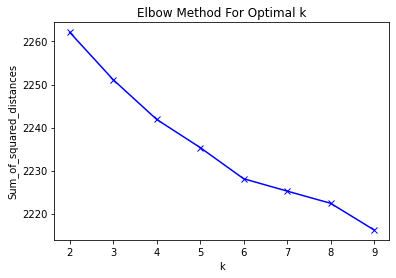

How many clusters do you want to use?
6
                                                  title  cluster
7     I had my surgery over a year ago. 1 month post...        0
50    My nurse said theyll be removed in 12 days at ...        0
137   Two days post op my doctor removed my splints,...        0
166   No pain at all until this morning now I see th...        0
191   Hi, My Septoplasty and Turbinate reduction too...        0
...                                                 ...      ...
2514  \n\tHello, I had septoplasty surgery on Friday...        0
2540  \n\t3 weeks ago I had Septoplasty, I had packi...        0
2583  \n\tI am still having trouble breathing, after...        0
2600  i had septoplasty and turbinate reduction done...        0
2627  I had a Septoplasty and Rhinoplasty 12 days ag...        0

[219 rows x 2 columns]
                                                  title  cluster
0     Can a septoplasty fix upper lip asymmetry? The...        1
3     I have a very weird 

In [47]:
clusters = cluster_questions(df.body.fillna(' ').tolist())



In [50]:
for cluster in range(0,6):
    clusters[clusters['cluster'] == cluster].to_csv(f"cluster_{cluster}.csv")

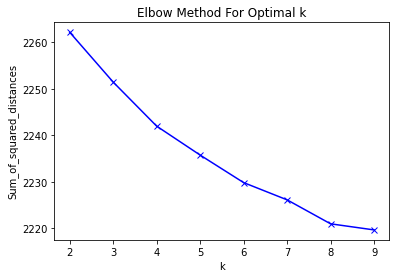

How many clusters do you want to use?
2
                                                  title  cluster
6     First of all, I'm not really sure that a septo...        0
7     I had my surgery over a year ago. 1 month post...        0
9     My ENT wants to do a harsh turbinate reduction...        0
10    In july 2021 i make septhoplasty and i got thi...        0
11    Would septoplasty fix my deviation? And would ...        0
...                                                 ...      ...
2616  \n\tHad procedure. Was told I had a collapse, ...        0
2618  I'm interested in getting a Septoplasty along ...        0
2619  Injured 10 days ago. Knee to face in Judo clas...        0
2624  I had a miscarriage around 8 weeks ago and we ...        0
2627  I had a Septoplasty and Rhinoplasty 12 days ag...        0

[1163 rows x 2 columns]
                                                  title  cluster
0     Can a septoplasty fix upper lip asymmetry? The...        1
1     I had a septoplasty

In [51]:
clusters_2 = cluster_questions(df.body.fillna(' ').tolist())
